In [6]:
%matplotlib inline


# Анализ аудиофайлов и определение высоты звука

Мы воспользовались функциями librosa, которые позволили нам построить гистограмму высоты звуков,:
1. сглаживание для уменьшения переходных тонов и удаления шумов
2. медианная фильтрация для удаления разрывов

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display

Песня А капелла "Evanescence - Bring Me To Life"

In [8]:
#y - audio time series, sr - sampling rate of y
y, sr = librosa.load('data/evanescence.ogg')

/home/tatyana/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [9]:
IPython.display.Audio(data=y, rate=sr)

Хромограмма без обработки

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0463112e-05
 -2.1491202e-05  0.0000000e+00]


[Text(0, 0.5, 'Default chroma')]

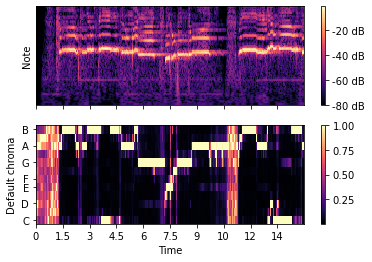

In [29]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)

loooooooooooop;[# достаем 15-секундный кусок из аудио-файла
idx = tuple([slice(None), slice(*list(librosa.time_to_frames([0, 15])))])

# CQT матрица  
C = np.abs(librosa.cqt(y=y, sr=sr))
fig, ax = plt.subplots(nrows=2, sharex=True)

img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                                y_axis='cqt_note', x_axis='time',
                                ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()

img2 = librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')

C,D,E,F,G,A,B - обозначаю ноты


![title](data/notes.jpg)


Попробуем изолировать сигнал от шума:

[0. 0. 0. ... 0. 0. 0.]


[Text(0, 0.5, 'Harmonic')]

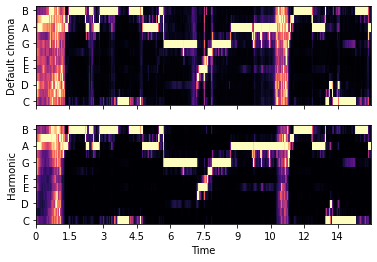

In [28]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Default chroma')
ax[0].label_outer()

librosa.display.specshow(chroma_harm[idx], y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Harmonic')

Попробуем убрать остатки шума с помощью non-local фильтрации, чтобы убрать редкий шум.

[Text(0, 0.5, 'Non-local')]

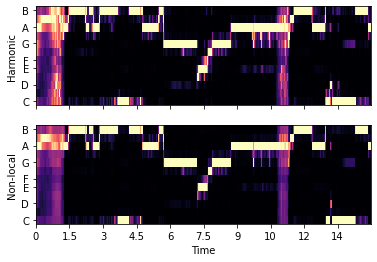

In [23]:
chroma_filter = np.minimum(chroma_harm,
                           librosa.decompose.nn_filter(chroma_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_harm[idx], y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Harmonic')
ax[0].label_outer()

librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Non-local')

Используем локальный медианный фильтр для дополнительной обработки.

[Text(0, 0.5, 'Median-filtered')]

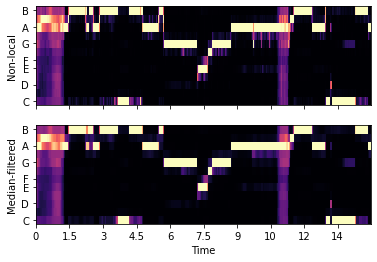

In [24]:
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(ylabel='Non-local')
ax[0].label_outer()

librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Median-filtered')

Сравниваем результат:

[Text(0, 0.5, 'Processed')]

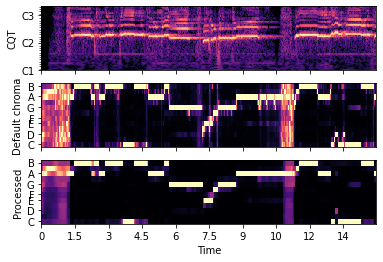

In [25]:
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', x_axis='time',
                         bins_per_octave=12*3, ax=ax[0])
ax[0].set(ylabel='CQT')
ax[0].label_outer()
librosa.display.specshow(chroma_orig[idx], y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(ylabel='Default chroma')
ax[1].label_outer()
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time', ax=ax[2])
ax[2].set(ylabel='Processed')